# Pandas

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np


In [2]:
acoes = ['WEGE3.SA', 'VALE3.SA', 'PETR4.SA', 'LREN3.SA', 'PETR3.SA']
dados_acoes = yf.download(acoes)['Adj Close']
dados_acoes

[*********************100%%**********************]  5 of 5 completed


,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2000-01-03,NaN,1.519753,1.506321,1.616371,0.122103
2000-01-04,5868.152344,1.434461,1.422993,1.577886,0.117818
2000-01-05,5868.152344,1.453846,1.408634,1.577886,0.117818
2000-01-06,5868.152344,1.442215,1.403763,1.577886,0.107107
2000-01-07,5868.152344,1.453846,1.410173,1.635613,0.107107
...,...,...,...,...,...
2023-10-10,13.000000,38.250000,35.209999,66.779999,35.299999
2023-10-11,13.100000,38.119999,35.119999,67.360001,35.169998
2023-10-13,12.690000,39.320000,36.279999,66.589996,34.540001


In [3]:
# retorno diario
retornos = dados_acoes.pct_change().dropna()
retornos

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_3764\3616399522.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = dados_acoes.pct_change().dropna()


,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2000-01-05,0.000000,0.013514,-0.010091,0.000000,0.000000
2000-01-06,0.000000,-0.008000,-0.003458,0.000000,-0.090910
2000-01-07,0.000000,0.008064,0.004566,0.036585,0.000000
2000-01-10,0.000000,0.029334,0.020545,0.082353,0.000000
2000-01-11,0.000000,-0.033679,-0.024586,0.002174,0.000000
...,...,...,...,...,...
2023-10-10,0.025237,0.010301,0.007439,0.006026,0.012913
2023-10-11,0.007692,-0.003399,-0.002556,0.008685,-0.003683
2023-10-13,-0.031298,0.031480,0.033030,-0.011431,-0.017913


In [4]:
#correlacao
retornos.corr()
#correlacao é a covariancia normalizada

,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
LREN3.SA,1.000000,0.237846,0.229225,0.204988,0.194981
PETR3.SA,0.237846,1.000000,0.926993,0.511491,0.231635
PETR4.SA,0.229225,0.926993,1.000000,0.475948,0.231462
VALE3.SA,0.204988,0.511491,0.475948,1.000000,0.216293
WEGE3.SA,0.194981,0.231635,0.231462,0.216293,1.000000


In [5]:
#covariancia
retornos.cov()

,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
LREN3.SA,0.001054,0.000211,0.000199,0.000169,0.000134
PETR3.SA,0.000211,0.000745,0.000675,0.000355,0.000133
PETR4.SA,0.000199,0.000675,0.000713,0.000323,0.000130
VALE3.SA,0.000169,0.000355,0.000323,0.000647,0.000116
WEGE3.SA,0.000134,0.000133,0.000130,0.000116,0.000445


[*********************100%%**********************]  6 of 6 completed


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_3764\3338796246.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = dados_acoes.pct_change().dropna()


[]

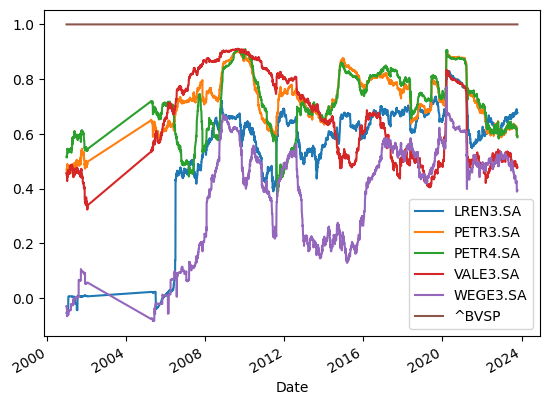

In [6]:
#correlacao com BVSP
acoes = ['WEGE3.SA', 'VALE3.SA', 'PETR4.SA', 'LREN3.SA', 'PETR3.SA', '^BVSP']
dados_acoes = yf.download(acoes)['Adj Close']

retornos = dados_acoes.pct_change().dropna()

#separando o retorno do ibov
retorno_ibov = retornos['^BVSP']

#dropando da tabela de retornos
retornos.drop('^BVSP', axis= 1)

#aplicando uma correlacao entre DFs com rolling
corr_movel = retornos.rolling(252).corr(retorno_ibov)
corr_movel = corr_movel.dropna().plot()
corr_movel.plot()

#a tabela mostra o quanto o retorno de 1 ano se correlaciona com a acao do ibov

<Axes: xlabel='Date'>

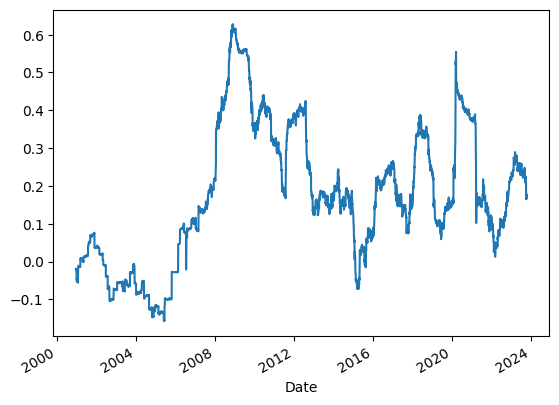

In [7]:
corr_weg_vale = retornos['WEGE3.SA'].rolling(252).corr(retornos['VALE3.SA']).dropna()
corr_weg_vale.plot()

## Desafios

In [8]:
acoes = ['ITUB3.SA', 'ITUB4.SA', 'SANB11.SA', 'WEGE3.SA', 'ABEV3.SA']
dados_acoes = yf.download(acoes, start= '2000-10-10')['Adj Close']


[*********************100%%**********************]  5 of 5 completed


In [9]:
retornos = dados_acoes.pct_change().dropna()
corr_36m = retornos.corr().dropna()
corr_36m

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_3764\750362222.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = dados_acoes.pct_change().dropna()


,ABEV3.SA,ITUB3.SA,ITUB4.SA,SANB11.SA,WEGE3.SA
ABEV3.SA,1.000000,0.419454,0.437016,0.389511,0.326236
ITUB3.SA,0.419454,1.000000,0.896589,0.634795,0.324148
ITUB4.SA,0.437016,0.896589,1.000000,0.694211,0.331644
SANB11.SA,0.389511,0.634795,0.694211,1.000000,0.296435
WEGE3.SA,0.326236,0.324148,0.331644,0.296435,1.000000


In [10]:
ibov = yf.download('^BVSP', start = '2000-01-01')['Adj Close']
sp500 = yf.download('^GSPC', start = '2000-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<class 'pandas.core.series.Series'>
Date
2000-01-04   -0.063733
2000-01-05    0.024856
2000-01-06   -0.008495
2000-01-07    0.012541
2000-01-10    0.043718
                ...   
2023-10-10    0.013729
2023-10-11    0.002690
2023-10-13   -0.011081
2023-10-16    0.006738
2023-10-17   -0.005368
Name: Adj Close, Length: 5890, dtype: float64
Date
2000-01-04   -0.038345
2000-01-05    0.001922
2000-01-06    0.000956
2000-01-07    0.027090
2000-01-10    0.011190
                ...   
2023-10-11    0.004293
2023-10-12   -0.006246
2023-10-13   -0.005019
2023-10-16    0.010594
2023-10-17   -0.000098
Name: Adj Close, Length: 5985, dtype: float64


<Axes: xlabel='Date'>

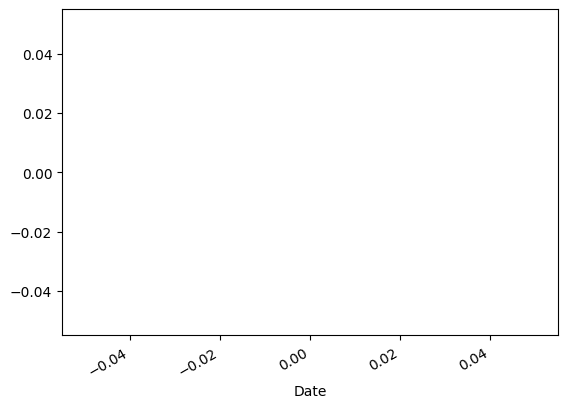

In [11]:
ibov = ibov.pct_change().dropna()
sp500 = sp500.pct_change().dropna()

print(type(ibov))

print(ibov)
print(sp500)


corr = ibov.rolling(252).corr(sp500).dropna()
corr.plot()

[*********************100%%**********************]  2 of 2 completed
                    ^BVSP        ^GSPC
Date                                  
2023-10-11  117051.000000  4376.950195
2023-10-12            NaN  4349.609863
2023-10-13  115754.000000  4327.779785
2023-10-16  116534.000000  4373.629883
2023-10-17  115908.429688  4373.200195
<class 'pandas.core.frame.DataFrame'>


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_3764\914993795.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = dados_indices.pct_change().dropna()


<Axes: xlabel='Date'>

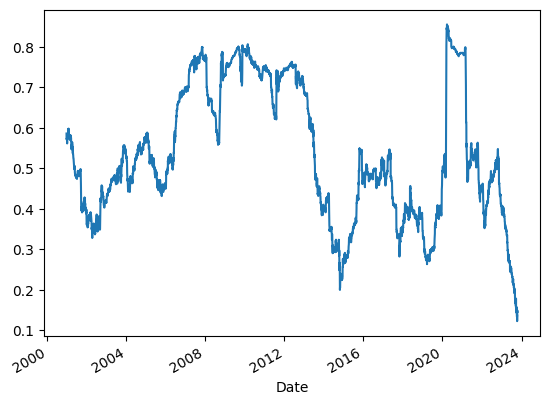

In [13]:
#gabarito, juntou no mesmo df e aplicou .corr entre colunas
acoes = ['^GSPC', '^BVSP']
dados_indices = yf.download(acoes, '2000-01-01')['Adj Close']
print(dados_indices.tail(5))
print(type(dados_indices))

retornos = dados_indices.pct_change().dropna()
corr_movel = retornos['^BVSP'].rolling(252).corr(retornos['^GSPC']).dropna()

corr_movel.plot()